In [1]:
#make the necessary imports 

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#set a random seed for replication
seed = 2019
np.random.seed(seed)

In [3]:
#read in training data
df = pd.concat([pd.read_csv(f,encoding='latin1', index_col='building_id') for f in glob.glob('train*.csv')], axis=1)
df.head(10).T

building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
damage_grade,3,2,3,2,3,2,3,1,2,1
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


### EDA

In [4]:
#check for null values
df.isna().sum()

damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
damage_grade                              260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  26060

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
damage_grade,260601.0,2.238272,0.611814,1.0,2.0,2.0,3.0,3.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

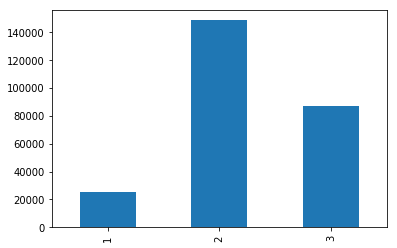

In [7]:
df['damage_grade'].value_counts().sort_index().plot.bar()

df['damage_grade'].value_counts()

### Data Preparation

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
#create feature and targets
features = df.drop('damage_grade', axis=1)
target = df['damage_grade']

#split data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

In [9]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



numeric_features = [0,1,2,3,4,5,6]
categorical_features = [7,8,9,10,11,12,13,25]

numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder())

Preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_transformer', numeric_transformer, numeric_features),
        ('categorical_transformer', categorical_transformer, categorical_features)
    ])

### LGBM Pipeline

In [10]:
from lightgbm import LGBMClassifier

lgb_pipe = make_pipeline(Preprocessor,
                      LGBMClassifier())

lgb_pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric_transformer',
                                                  Pipeline(memory=None,
                                                           steps=[('standardscaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('categorical_transformer',
         

In [15]:
parameters = {
    'lgbmclassifier__n_estimators': [1000,1200, 1500],
    'lgbmclassifier__learning_rate': [0.1],
    'lgbmclassifier__boosting_type': ['goss'],
    'lgbmclassifier__max_depth' : [25, 50, 75],
    'lgbmclassifier__random_state' : [seed],
    'lgbmclassifier__num_class' : [3],
    'lgbmclassifier__objective': ['multiclass'],
    'lgbmclassifier__device':['gpu']
    }



lgb_grid = GridSearchCV(lgb_pipe, parameters, n_jobs=5, 
                   cv=5, scoring='f1_micro',
                   verbose=2, refit=True)

In [16]:
lgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 20.4min
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed: 27.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric_transformer',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('standardscaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=T

In [17]:
from sklearn.metrics import confusion_matrix, f1_score

# Print the best parameters found
print(lgb_grid.best_params_)

print()
print(lgb_grid.best_score_)

print()
y_pred_lgb = lgb_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_lgb))

print()
print(f1_score(y_test, y_pred_lgb, average='micro'))

#0.7298593657067209

{'lgbmclassifier__boosting_type': 'goss', 'lgbmclassifier__device': 'gpu', 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 25, 'lgbmclassifier__n_estimators': 1500, 'lgbmclassifier__num_class': 3, 'lgbmclassifier__objective': 'multiclass', 'lgbmclassifier__random_state': 2019}

0.7317536454336148

[[ 2556  2379    85]
 [ 1165 24765  3733]
 [  126  6573 10739]]

0.7302239020740201


### HistGradientBoostingClassifier

In [18]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

In [19]:
hgb_pipe = make_pipeline(Preprocessor,
                      HistGradientBoostingClassifier())

hgb_pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric_transformer',
                                                  Pipeline(memory=None,
                                                           steps=[('standardscaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('categorical_transformer',
         

In [20]:
parameters = {
    'histgradientboostingclassifier__max_iter': [1000,1200,1500],
    'histgradientboostingclassifier__learning_rate': [0.1],
    'histgradientboostingclassifier__max_depth' : [25, 50, 75],
    'histgradientboostingclassifier__l2_regularization': [1.5],
    'histgradientboostingclassifier__scoring': ['f1_micro'],
    'histgradientboostingclassifier__random_state' : [seed],
    }



hgb_grid = GridSearchCV(hgb_pipe, parameters, n_jobs=5, 
                   cv=5, scoring='f1_micro',
                   verbose=2, refit=True)

In [21]:
hgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 28.9min
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed: 38.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric_transformer',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('standardscaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=T

In [22]:
# Print the best parameters found
print(hgb_grid.best_params_)

# Print the best scores found
print()
print(hgb_grid.best_score_)

#Predict on X_test and print the confusion matrix
print()
y_pred_hgb = hgb_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_hgb))

#Print the F1_score
print()
print(f1_score(y_test, y_pred_hgb, average='micro'))

#0.7387617275186585

#0.7366320676886475

{'histgradientboostingclassifier__l2_regularization': 1.5, 'histgradientboostingclassifier__learning_rate': 0.1, 'histgradientboostingclassifier__max_depth': 25, 'histgradientboostingclassifier__max_iter': 1500, 'histgradientboostingclassifier__random_state': 2019, 'histgradientboostingclassifier__scoring': 'f1_micro'}

0.7382722563315426

[[ 2621  2315    84]
 [ 1102 24977  3584]
 [  136  6412 10890]]

0.7384355634005487


### Prepare for submission

In [24]:
#read in test data
test = pd.read_csv('test_values.csv', index_col='building_id')

In [25]:
#predict on test with hgb 
submission_pred = hgb_grid.predict(test)

In [26]:
#create submission file
submission = pd.DataFrame(data=submission_pred, columns=['damage_grade']).set_index(test.index)
submission.to_csv('submission.csv')
submission.tail(20)

,damage_grade
building_id,
89531,2
1031834,3
512017,2
660885,2
744356,2
390588,3
454519,3
1051332,2
590265,2
